# TimeSeries prediction models comparison

In [5]:
import pandas as pd
from pathlib import Path
import glob

import matplotlib.pyplot as plt

from utils import HORIZONS

In [13]:
# in results directory there is a list of json files. Each contains a json object. I want to load those files to a single pandas dataframe, where each file is one row

def read_results(directory='results') -> pd.DataFrame:
    frames = []
    for file in glob.glob(f"{directory}/*.json"):
        with open(file) as f:
            data = pd.read_json(f, typ='series', orient='index')
            frames.append(data)
    res = pd.concat(frames, axis=1).T
    return res

df = read_results()
df.head(20)

,mape,mse,rmse,mae,model,forecast_horizon,dataset,experiment_time,parameters
0,6.764675,0.010776,0.103807,0.075213,NaiveSeasonal,1,electricity,1715278115.881607,{'K': 1}
1,945.705504,1.492013,1.22148,0.801439,Prophet,3,walmart-sales,1715279199.903804,"{'add_seasonalities': None, 'country_holidays'..."
2,6.259882,0.009388,0.096891,0.069599,ARIMA,1,electricity,1715279492.626692,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
3,278.121997,0.904597,0.951103,0.733511,RNNModel,3,walmart-sales,1715279787.329378,"{'model': 'LSTM', 'hidden_dim': 20, 'n_rnn_lay..."
4,8.080169,0.041759,0.20435,0.089071,XGBModel,10,electricity,1715277717.013348,"{'lags': 168, 'lags_past_covariates': None, 'l..."
5,2.162213,0.002918,0.054021,0.023792,XGBModel,1,electricity,1715277716.261915,"{'lags': 168, 'lags_past_covariates': None, 'l..."
6,3.431986,0.007242,0.085102,0.037877,XGBModel,2,electricity,1715277716.445576,"{'lags': 168, 'lags_past_covariates': None, 'l..."
7,23.234333,0.111367,0.333717,0.257685,NaiveSeasonal,5,electricity,1715278117.517496,{'K': 1}
8,4.825865,0.014002,0.11833,0.05343,XGBModel,3,electricity,1715277716.633687,"{'lags': 168, 'lags_past_covariates': None, 'l..."
9,22.090513,0.102258,0.319779,0.247924,ARIMA,5,electricity,1715279563.90106,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."


## Model comparison

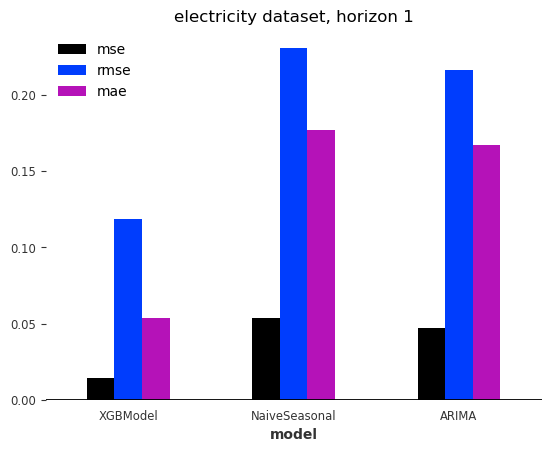

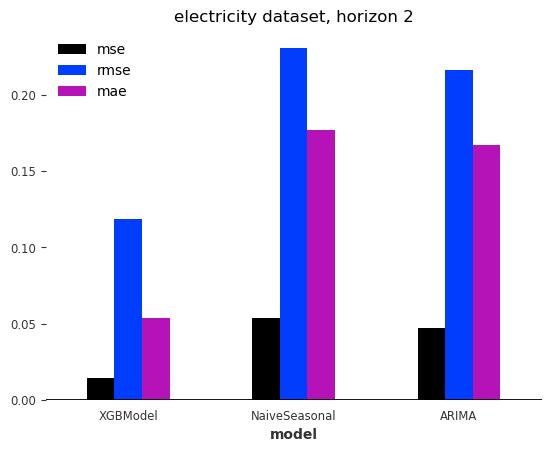

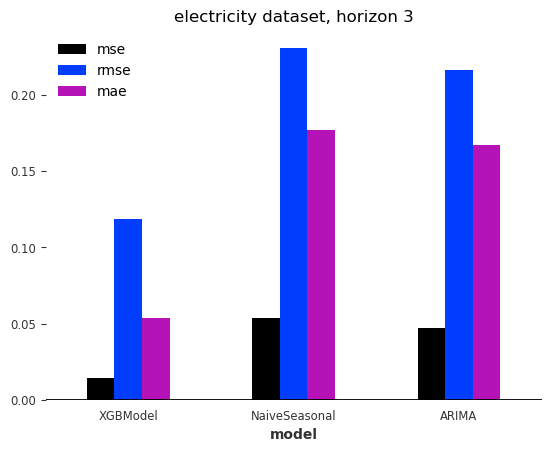

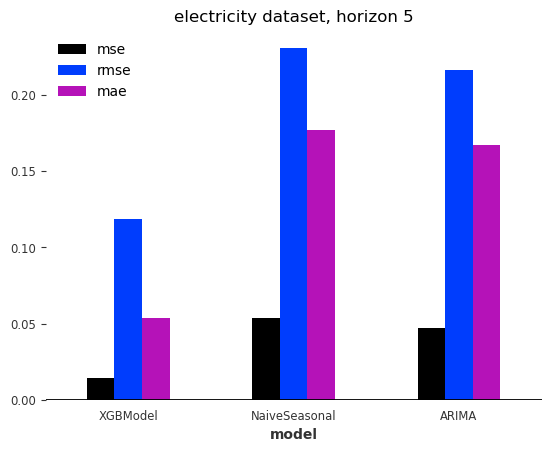

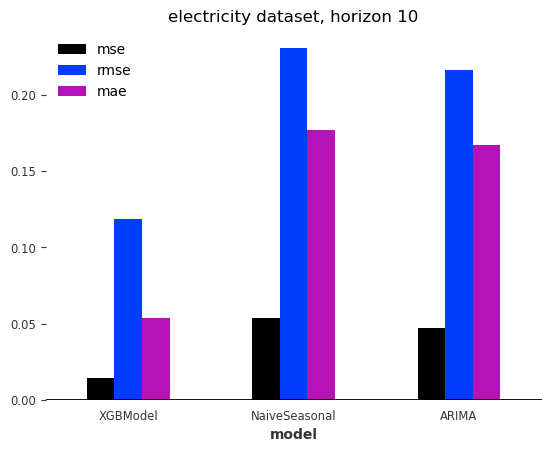

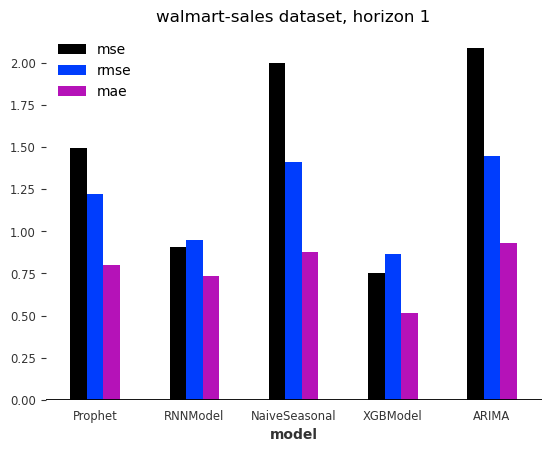

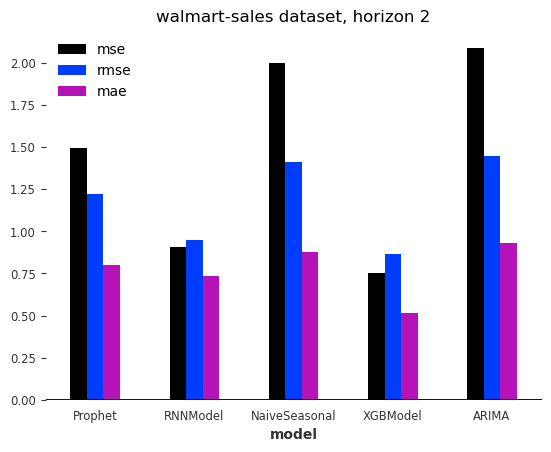

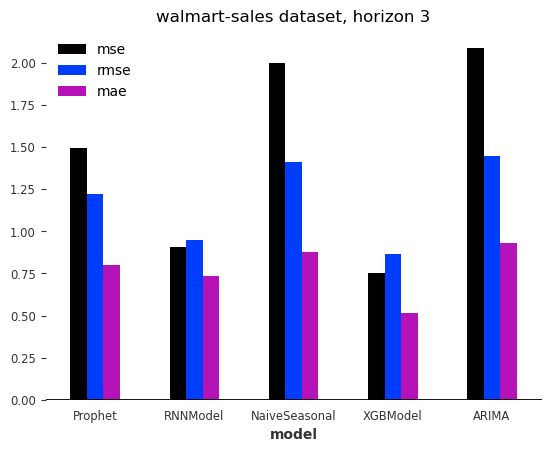

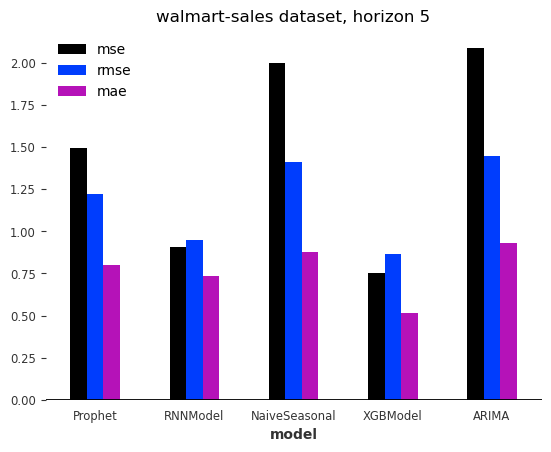

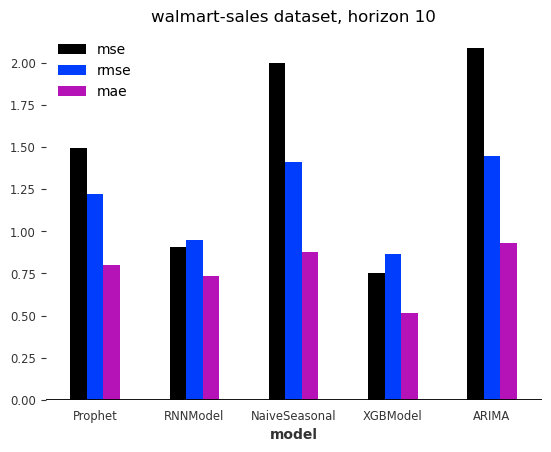

In [14]:
# take unique valeus from dataset column
datesets = df['dataset'].unique()

for dataset in datesets:
  for horizon in HORIZONS:
    df_walmart = df[df['dataset'] == dataset]
    df_walmart = df_walmart[df_walmart['forecast_horizon'] == 3]
    df_walmart.plot(x='model', y=['mse', 'rmse', 'mae'], kind='bar')

    plt.title(f'{dataset} dataset, horizon {horizon}')
    plt.xticks(rotation=0)
    plt.grid(False)
    plt.axhline(y=0, color='k')
    plt.show()

### Walmart-sales

<Axes: xlabel='model'>

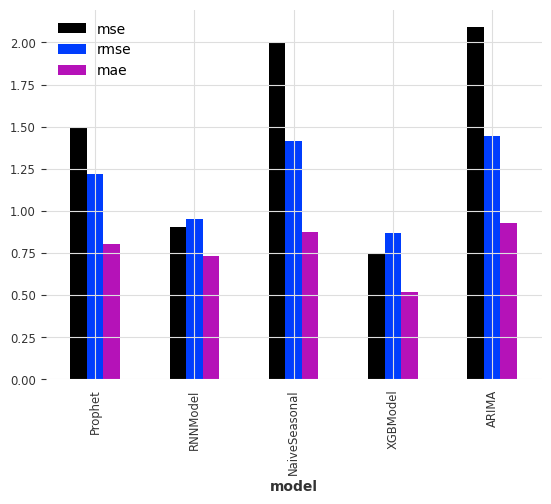

In [15]:
df_walmart = df[df['dataset'] == 'walmart-sales']

df_walmart.plot(x='model', y=['mse', 'rmse', 'mae'], kind='bar')